### Import Moduls

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from Extract_Face_Features import Extract_Face_Features
import warnings
warnings.filterwarnings('ignore')

### Read an image

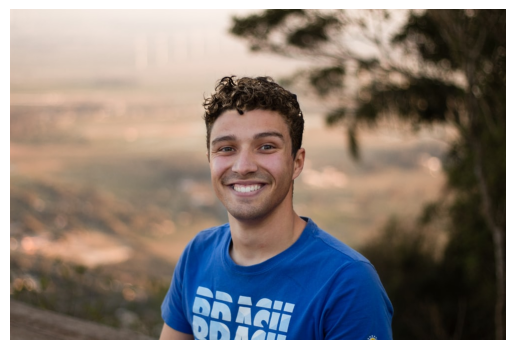

In [64]:
image = cv2.imread("man.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
plt.figure()
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


### Test the Extract_Face_Features() Function

In [65]:
outputs = Extract_Face_Features(image)

print("\nbbox of face:")
print(outputs["face_box"])

print("\nGender feature vector:")
print(outputs["gender_features"])

print("\nAge feature vector:")
print(outputs["age_features"])


bbox of face:
[398, 199, 570, 416]

Gender feature vector:
[-0.8963007  -0.7796583  -1.1831461  -0.6785609  -1.9387906  -0.325422
  0.5035814  -1.0804967  -1.089385   -1.0057808  -0.16997415 -0.7871046
  0.22932506 -1.2130685   0.17243522 -1.7494183   0.65898263 -0.9520457
 -0.37788284 -0.4337988  -0.76205033 -0.13162321 -2.1756933  -0.18890905
 -1.5377829  -1.8729744  -0.40749866  1.1879046  -0.7926402  -1.405906
  0.35035992 -1.0442297   1.4612848  -1.9037619  -1.4439125  -0.6234779
 -1.180662   -2.1522446  -1.4251163  -0.27461892  0.2820961  -0.44431323
 -0.26771528 -1.2007422  -0.5417141  -0.5734938   1.3507936  -0.0376519
 -0.71095335  0.48103046 -1.5056431  -0.11411029  1.8253447  -0.39512914
 -1.1895579  -1.3301182  -1.8883083  -0.9596142  -2.6762056  -0.72914076
 -0.93003815 -1.2193118  -1.5716511  -1.1145501  -1.2138884  -1.0319643
 -0.3697021  -0.47122377 -0.7403106  -0.40763652  2.5756423  -2.2153966
  2.2738054  -0.95312065 -0.73783576 -1.0820858   2.861485   -0.6425506
 -

Part A

In [ ]:
#exctracting features of all images in the dataset folder
#DO NOT EXECUTE THIS CELL

folder_path = "Dataset"
folder_saved_path="Descriptors"

#saving features into Descriptors

for filename in os.listdir(folder_path):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):  # image formats
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        output=Extract_Face_Features(image)

        saved_path=os.path.join(folder_saved_path,os.path.splitext(filename)[0]+".txt")
        np.savetxt(saved_path,np.stack([output["age_features"],output["gender_features"]],axis=0)) # [age_features, gender_features], shape of the saved array=(2,512)
        

In [66]:
import re

def data_loader_age():

    listdir_names=os.listdir("Descriptors")
    n_samples=len(listdir_names)
    n_features=len(np.loadtxt(os.path.join("Descriptors",listdir_names[0]))[0])

    X=np.empty((n_samples,n_features),dtype=np.float32)
    y=np.empty(n_samples,dtype=np.float32)

    for i,filename in enumerate(listdir_names):

        X[i]=np.loadtxt(os.path.join("Descriptors",filename))[0]
        y[i]=int(re.split(r"_",filename)[0])


    return X,y


def data_loader_gender():

    listdir_names=os.listdir("Descriptors")
    n_samples=len(listdir_names)
    n_features=len(np.loadtxt(os.path.join("Descriptors",listdir_names[0]))[1])

    X=np.empty((n_samples,n_features),dtype=np.float32)
    y=np.empty(n_samples)

    for i,filename in enumerate(listdir_names):

        X[i]=np.loadtxt(os.path.join("Descriptors",filename))[1]
        y[i]=int(re.split(r"_",filename)[1])


    return X,y


Part B

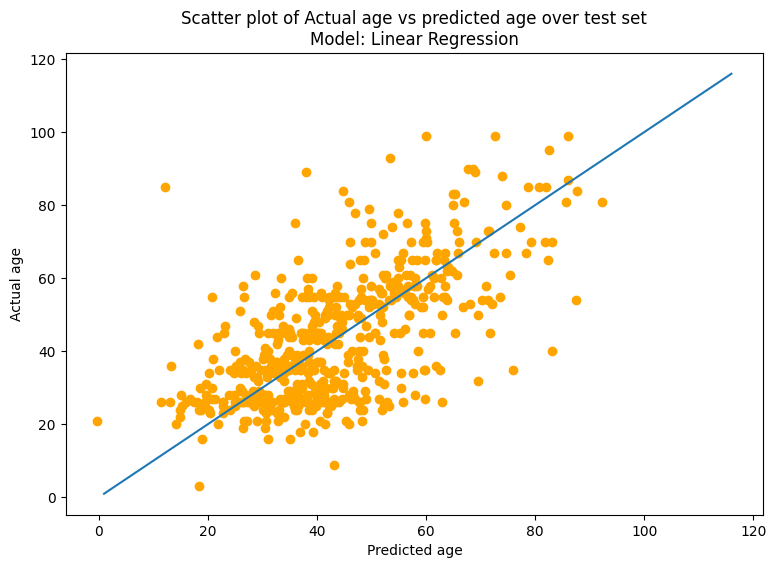

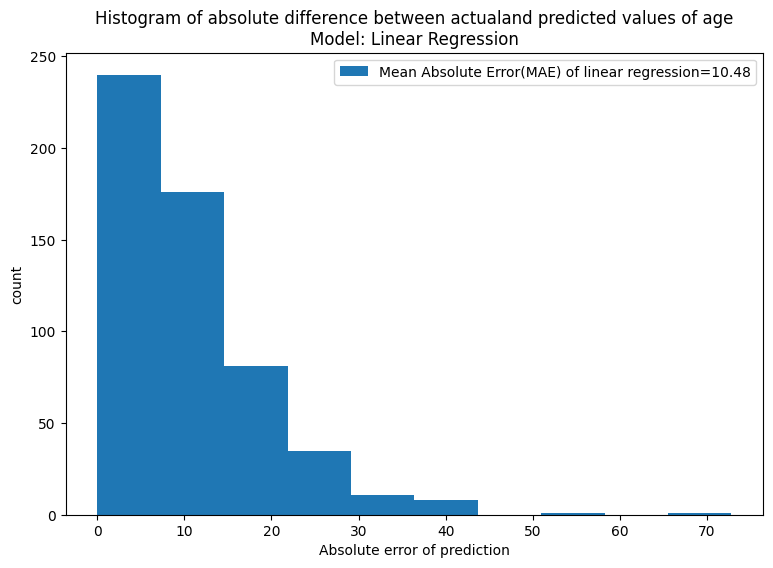

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#importing data for regression
X_age_features,y_age=data_loader_age()  

X_train,X_test,y_train,y_test=train_test_split(X_age_features,y_age,test_size=0.2,shuffle=True, random_state=42)

linear=LinearRegression()

linear.fit(X_train,y_train)
y_pred=linear.predict(X_test)

mae_test=mean_absolute_error(y_test,y_pred)

plt.figure(figsize=(9,6))
plt.scatter(y_pred,y_test,c="orange")
plt.plot([y_age.min(),y_age.max()],[y_age.min(),y_age.max()])
plt.title("Scatter plot of Actual age vs predicted age over test set\nModel: Linear Regression")
plt.ylabel("Actual age")
plt.xlabel("Predicted age")
#plt.savefig("B1_scatter")
plt.show()

plt.figure(figsize=(9,6))
plt.hist(np.abs(y_pred-y_test),label=f"Mean Absolute Error(MAE) of linear regression={mae_test:.2f}")
plt.title("Histogram of absolute difference between actualand predicted values of age\nModel: Linear Regression")
plt.xlabel("Absolute error of prediction")
plt.ylabel("count")
plt.legend()
#plt.savefig("B1_hist")
plt.show()


In [68]:
#part B2
#Ridge and Lasso

from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
lasso=Lasso()

alpha_list=np.logspace(-2,2.2,10)

ridge_cv=GridSearchCV(ridge,param_grid={"alpha":alpha_list},cv=10,n_jobs=-1)
lasso_cv=GridSearchCV(lasso,param_grid={"alpha":alpha_list},cv=10,n_jobs=-1)

ridge_cv.fit(X_train,y_train)
lasso_cv.fit(X_train,y_train)

alpha_ridge=ridge_cv.best_params_["alpha"]
alpha_lasso=lasso_cv.best_params_["alpha"]

ridge=Ridge(alpha=alpha_ridge)
lasso=Lasso(alpha=alpha_lasso)

y_pred_ridge=ridge.fit(X_train,y_train).predict(X_test)
y_pred_lasso=lasso.fit(X_train,y_train).predict(X_test)

mae_ridge=mean_absolute_error(y_pred_ridge,y_test)
mae_lasso=mean_absolute_error(y_pred_lasso,y_test)

In [117]:
print(np.round(alpha_list,3))

[1.00000e-02 2.90000e-02 8.60000e-02 2.51000e-01 7.36000e-01 2.15400e+00
 6.31000e+00 1.84780e+01 5.41170e+01 1.58489e+02]


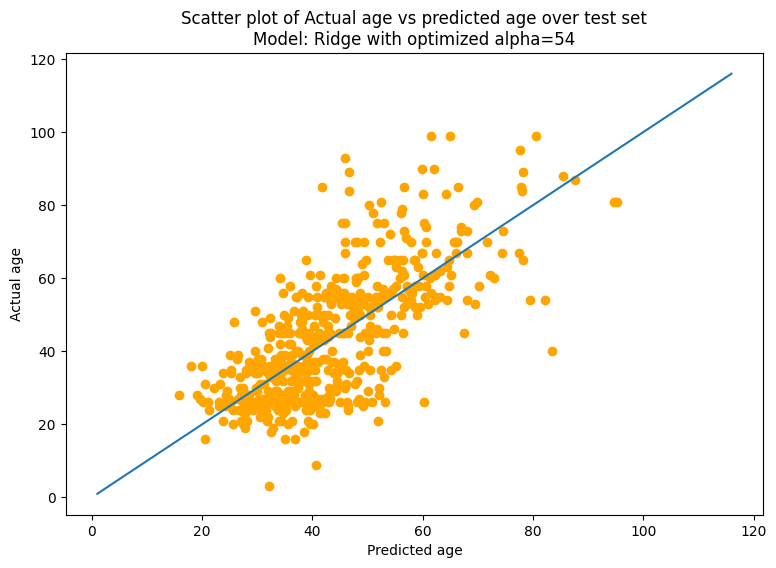

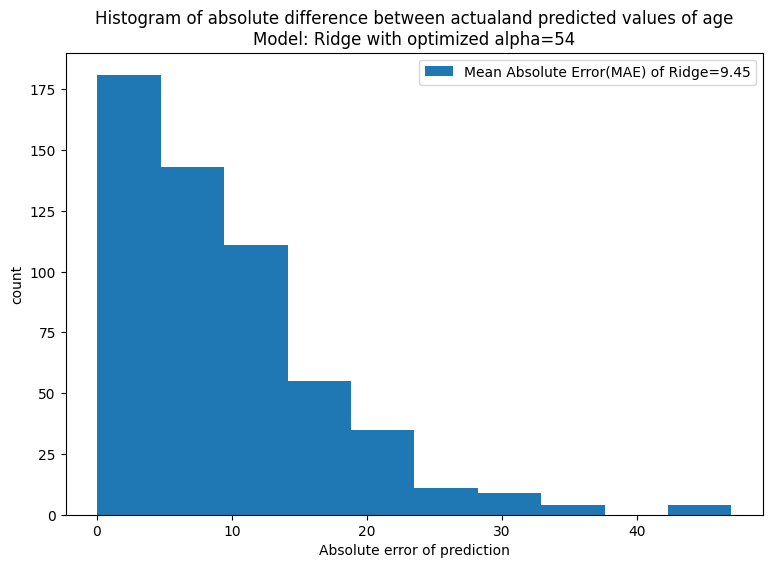

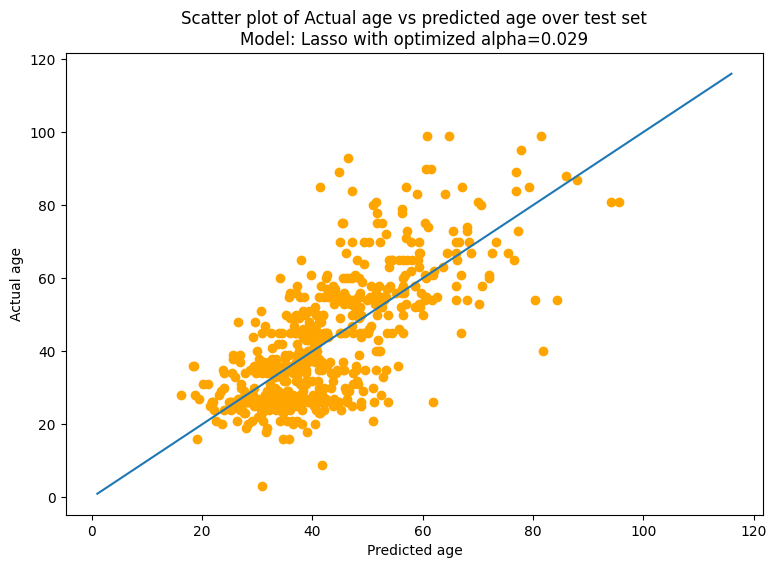

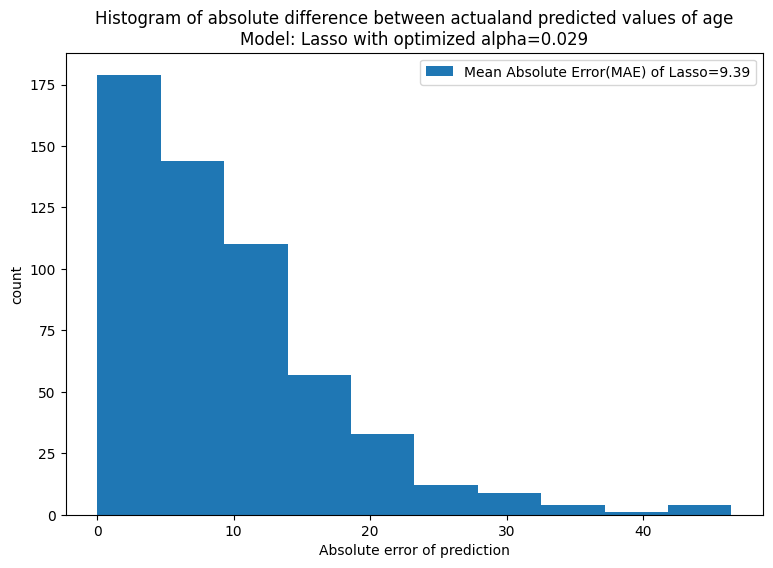

In [ ]:

plt.figure(figsize=(9,6))
plt.scatter(y_pred_ridge,y_test,c="orange")
plt.plot([y_age.min(),y_age.max()],[y_age.min(),y_age.max()])
plt.title(f"Scatter plot of Actual age vs predicted age over test set\nModel: Ridge with optimized alpha={alpha_ridge:.0f}")
plt.ylabel("Actual age")
plt.xlabel("Predicted age")
#plt.savefig("B2_scatter_ridge")
plt.show()

plt.figure(figsize=(9,6))
plt.hist(np.abs(y_pred_ridge-y_test),label=f"Mean Absolute Error(MAE) of Ridge={mae_ridge:.2f}")
plt.title(f"Histogram of absolute difference between actualand predicted values of age\nModel: Ridge with optimized alpha={alpha_ridge:.0f}")
plt.xlabel("Absolute error of prediction")
plt.ylabel("count")
plt.legend()
#plt.savefig("B2_hist_ridge")
plt.show()

plt.figure(figsize=(9,6))
plt.scatter(y_pred_lasso,y_test,c="orange")
plt.plot([y_age.min(),y_age.max()],[y_age.min(),y_age.max()])
plt.title(f"Scatter plot of Actual age vs predicted age over test set\nModel: Lasso with optimized alpha={alpha_lasso:.3f}")
plt.ylabel("Actual age")
plt.xlabel("Predicted age")
#plt.savefig("B2_scatter_lasso")
plt.show()

plt.figure(figsize=(9,6))
plt.hist(np.abs(y_pred_lasso-y_test),label=f"Mean Absolute Error(MAE) of Lasso={mae_lasso:.2f}")
plt.title(f"Histogram of absolute difference between actualand predicted values of age\nModel: Lasso with optimized alpha={alpha_lasso:.3f}")
plt.xlabel("Absolute error of prediction")
plt.ylabel("count")
plt.legend()
#plt.savefig("B2_hist_lasso")
plt.show()

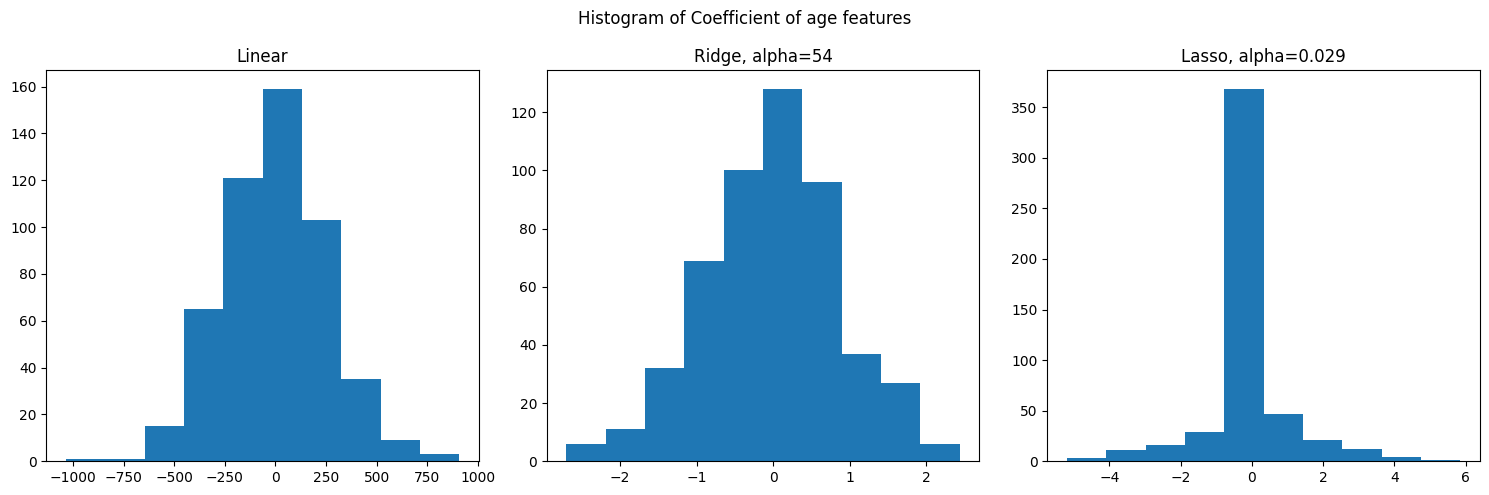

In [113]:
#B3 histogram of each model's coefficients

lr_coefs=linear.coef_
ridge_coefs=ridge.coef_
lasso_coefs=lasso.coef_

plt.figure(figsize=(15,5))
plt.subplot(1,3,1,title="Linear")
plt.hist(lr_coefs)

plt.subplot(1,3,2,title=f"Ridge, alpha={alpha_ridge:.0f}")
plt.hist(ridge_coefs)

plt.subplot(1,3,3,title=f"Lasso, alpha={alpha_lasso:.3f}")
plt.hist(lasso_coefs)

plt.suptitle("Histogram of Coefficient of age features")
plt.tight_layout()
plt.savefig("B3_all_models_coef")
plt.show()


In [98]:
#mean and var calculation

print(f"Mean and Variance of Coefficients values for Linear model={lr_coefs.mean():.3f}, {lr_coefs.var():.1f}")
print(f"Mean and Variance of Coefficients values for Ridge Model={ridge_coefs.mean():.3f}, {ridge_coefs.var():.2f}")


Mean and Variance of Coefficients values for Linear model=0.008, 64743.0
Mean and Variance of Coefficients values for Ridge Model=-0.004, 0.79


Part C

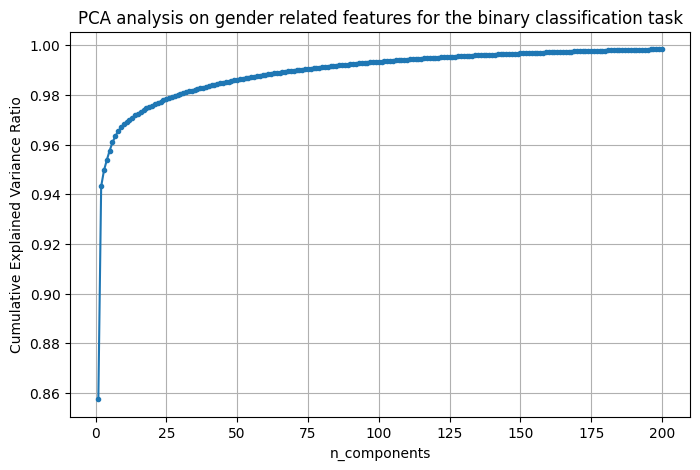

In [70]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_gender_features,y_gender=data_loader_gender()

scaler=StandardScaler()

X_gender_scaled=scaler.fit_transform(X_gender_features)

cumulative_variance_list=[]
n_components_max=200

pca=PCA(n_components=n_components_max)
pca.fit(X_gender_scaled)

explained_variance_array=pca.explained_variance_ratio_

for i in range(1,n_components_max+1):

    cumulative_variance_list.append(explained_variance_array[0:i].sum())

plt.figure(figsize=(8,5))

plt.plot(np.arange(1,n_components_max+1),cumulative_variance_list,marker="o",markersize=3)

plt.xlabel("n_components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("PCA analysis on gender related features for the binary classification task")
plt.savefig("PCA_explained_ratio")
plt.grid()

plt.show()


In [71]:
#finding the least number of components to keep 95% of the explained variance

explained_variance_ratio_cumulative=pca.explained_variance_ratio_.cumsum()
print(explained_variance_ratio_cumulative[explained_variance_ratio_cumulative<=0.95])
print(f"n_components to keep 95% of the explained variance = {len(explained_variance_ratio_cumulative[explained_variance_ratio_cumulative<=0.95])}")

[0.8574319  0.9431591  0.94960225]
n_components to keep 95% of the explained variance = 3


In [72]:
#if only 10 components are kept

print(f"If only 10 components are kept, the explained variance ratio would be {explained_variance_ratio_cumulative[9]*100:.1f}%")

If only 10 components are kept, the explained variance ratio would be 96.8%


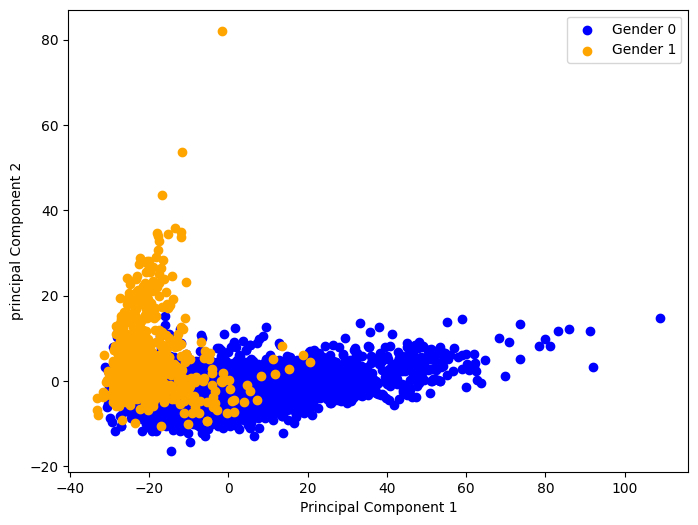

In [44]:
#Keeping first 2 principal components

pca_2=PCA(n_components=2)
pca_trasformed_X=pca_2.fit_transform(X_gender_scaled)

plt.figure(figsize=(8,6))

colors_list=["blue","orange"]
for c in [0,1]:
    indices=np.where(y_gender==c)[0]
    plt.scatter(pca_trasformed_X[indices,0],pca_trasformed_X[indices,1],c=colors_list[c],label="Gender "+str(c))


plt.xlabel("Principal Component 1")
plt.ylabel("principal Component 2")
plt.legend()
plt.savefig("PCA_2_scatter_gender")

plt.show()


Part D

In [3]:
#gender dataset loading

X_gender, y_gender=data_loader_gender()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

X_gender_train, X_gender_test, y_gender_train, y_gender_test= train_test_split(X_gender, y_gender, test_size=0.2, random_state=42, shuffle=True,stratify=y_gender)

pipeline_1=Pipeline([("scaler_1",StandardScaler()), ("poly_transform",PolynomialFeatures(degree=2)),
                     ("scaler_2", StandardScaler()), ("pca",PCA(n_components=10)), ("logit",LogisticRegression(class_weight="balanced"))])

pipeline_1.fit(X_gender_train, y_gender_train)

# pipeline_1["pca"].explained_variance_ratio_

pipeline_2=Pipeline([("scaler",StandardScaler()), ("pca",PCA(n_components=10)), ("logit",LogisticRegression(class_weight="balanced"))])

pipeline_2.fit(X_gender_train, y_gender_train)

pipeline_3=Pipeline([("scaler",StandardScaler()), ("pca",PCA(n_components=10)), ("lda",LinearDiscriminantAnalysis(priors=[0.5,0.5]))])

pipeline_3.fit(X_gender_train, y_gender_train)

pipeline_4=Pipeline([("scaler",StandardScaler()), ("pca",PCA(n_components=10)), ("qda",QuadraticDiscriminantAnalysis(priors=[0.5,0.5]))])

pipeline_4.fit(X_gender_train, y_gender_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                ('qda', QuadraticDiscriminantAnalysis(priors=[0.5, 0.5]))])

In [4]:
#percentage of men and women class samples

print("Men class percentage: ",np.round(len(y_gender_train[y_gender_train==0])*100/len(y_gender_train),1),"%")
print("Women class percentage: ",np.round(len(y_gender_train[y_gender_train==1])*100/len(y_gender_train),1),"%")

Men class percentage:  78.6 %
Women class percentage:  21.4 %


In [5]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay

gender_models_dict={"1":pipeline_1,"2":pipeline_2,"3":pipeline_3,"4":pipeline_4}

#printing classification reports
for key in gender_models_dict.keys():

    print(f"Classification report of pipeline {int(key)} on the test set:")
    print(classification_report(y_gender_test, gender_models_dict[key].predict(X_gender_test)))
    print(70*"#")



Classification report of pipeline 1 on the test set:
              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       435
         1.0       0.67      0.77      0.72       118

    accuracy                           0.87       553
   macro avg       0.80      0.84      0.82       553
weighted avg       0.88      0.87      0.87       553

######################################################################
Classification report of pipeline 2 on the test set:
              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90       435
         1.0       0.62      0.81      0.70       118

    accuracy                           0.85       553
   macro avg       0.78      0.84      0.80       553
weighted avg       0.88      0.85      0.86       553

######################################################################
Classification report of pipeline 3 on the test set:
              precision    recall  f1-score  

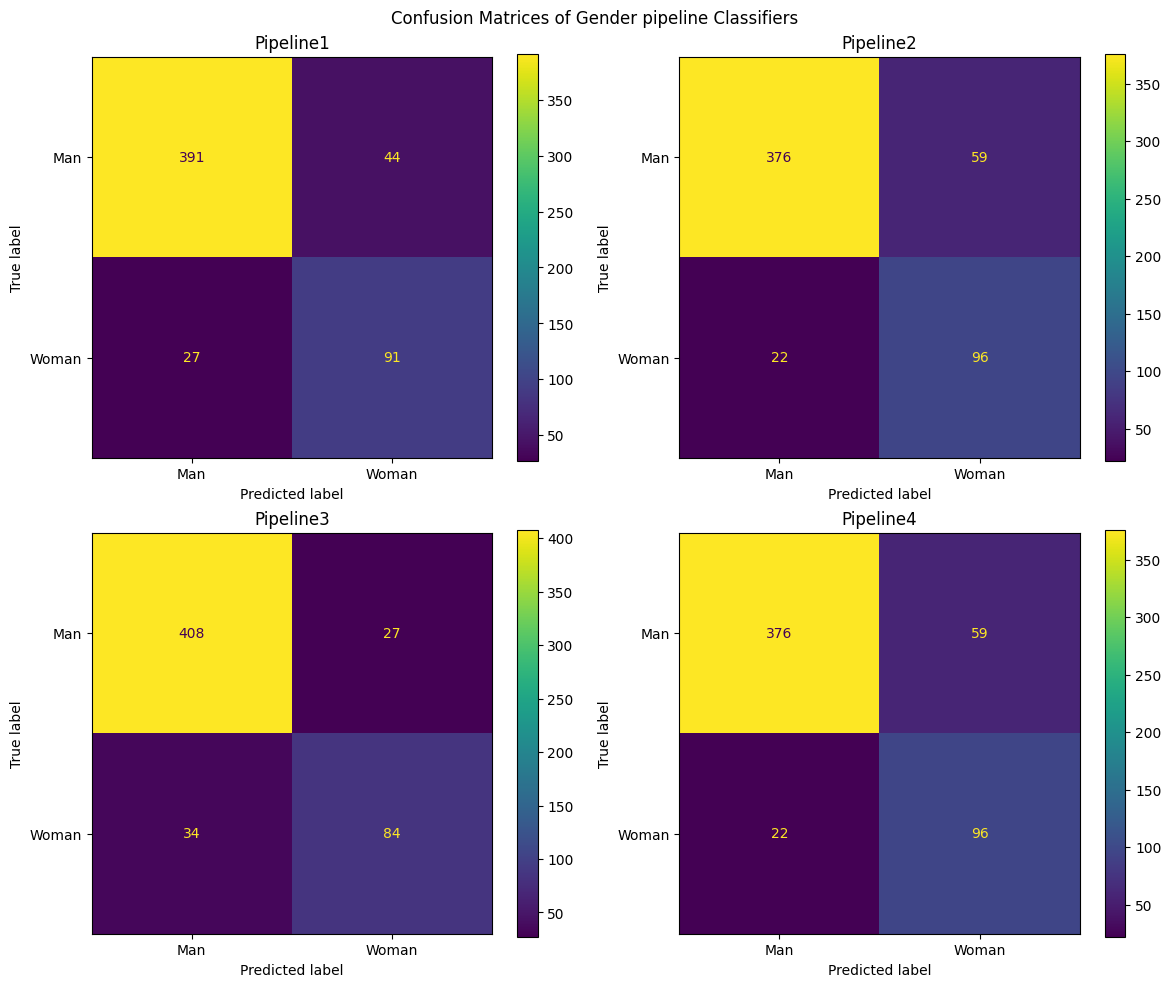

In [14]:
#confusion matrix plotting

fig=plt.figure(figsize=(12,10))

for i,key in enumerate(gender_models_dict.keys()):

    ax=fig.add_subplot(2,2,i+1,title=f"Pipeline{int(key)}")

    cm=confusion_matrix(y_gender_test,gender_models_dict[key].predict(X_gender_test))
    cm_display=ConfusionMatrixDisplay(cm,display_labels=["Man","Woman"])
    cm_display.plot(ax=ax)

plt.suptitle("Confusion Matrices of Gender pipeline Classifiers")
plt.savefig("gender_cm")
plt.tight_layout()
plt.show()    



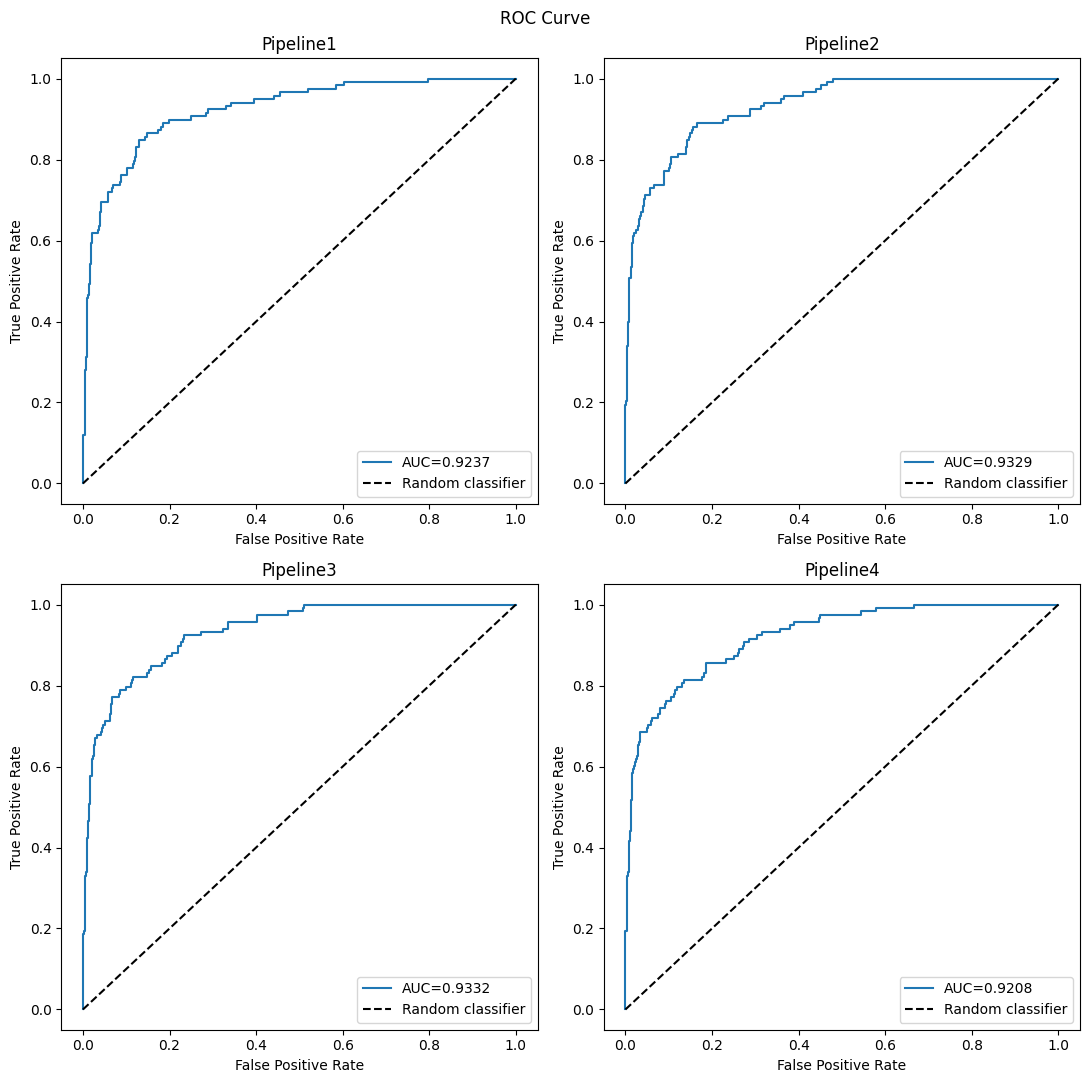

In [17]:
#ROC curve plotting


fig=plt.figure(figsize=(11,11))

for i,key in enumerate(gender_models_dict.keys()):

    y_score=gender_models_dict[key].predict_proba(X_gender_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_gender_test, y_score)

    auc=roc_auc_score(y_gender_test,y_score)
    ax=fig.add_subplot(2,2,i+1,title=f"Pipeline{int(key)}")
    
    ax.plot(fpr, tpr, label=f"AUC={auc:.4f}")
    ax.plot([0, 1], [0, 1], 'k--', label="Random classifier")

    plt.xlabel("False Positive Rate")   
    
    plt.ylabel("True Positive Rate")
    plt.legend()

plt.suptitle("ROC Curve")
plt.savefig("gender_roc")
plt.tight_layout()
plt.show()  

Pipleline 3 slightly has the largest AUC score among all, so we pick this model as the best one. AUC=0.9332 (even confusion matrix confirms that this one is the best)

In [ ]:
#fitting pipeline 3 on whole gender dataset, then saving

import joblib

pipeline_3.fit(X_gender,y_gender)

joblib.dump(pipeline_3,"Best_Gender_Model.joblib")


['Best_Gender_Model.joblib']

Part E; age estimation as a classification problem

In [9]:

X_age_features, y_age=data_loader_age()


In [47]:
from sklearn.model_selection import train_test_split

#classification binning
#age_bins=np.array([0,22,35,50,150]) #age_classes=[1,2,3,4,5,6]

#age_bins=np.array([0,27,32,40,55,62,150])

age_bins=np.array([0,18,35,58,150])

y_age_classified=np.digitize(y_age,age_bins)


#train test split
X_age_train,X_age_test,y_age_classified_train,y_age_classified_test=train_test_split(X_age_features,y_age_classified,shuffle=True,
                                                                                     test_size=0.2,random_state=0,stratify=y_age_classified)

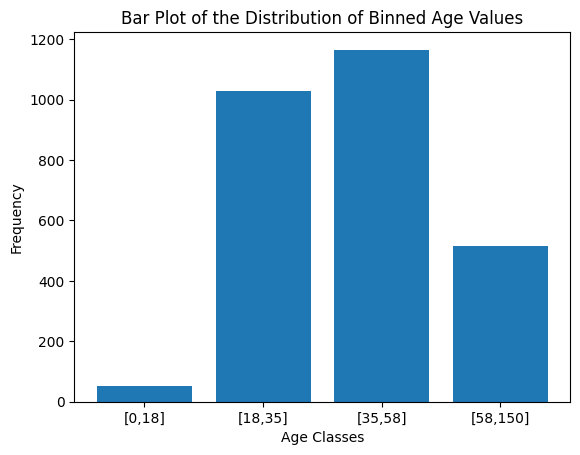

In [55]:
#the barplot of y_age_classified
values, counts=np.unique(y_age_classified,return_counts=True)
plt.figure()
plt.bar(values,counts)
plt.xlabel("Age Classes")
plt.ylabel("Frequency")
plt.title("Bar Plot of the Distribution of Binned Age Values")
plt.xticks([1,2,3,4],["[0,18]","[18,35]","[35,58]","[58,150]"])
plt.show()

In [56]:
#training four pipelines on classified age dataset
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipeline_age_1=Pipeline([("scaler_1",StandardScaler()), ("poly_transform",PolynomialFeatures(degree=2)),
                     ("scaler_2", StandardScaler()), ("pca",PCA(n_components=40)), ("logit",LogisticRegression(class_weight="balanced"))])

pipeline_age_1.fit(X_age_train, y_age_classified_train)

pipeline_age_2=Pipeline([("scaler",StandardScaler()), ("pca",PCA(n_components=40)), ("logit",LogisticRegression(class_weight="balanced"))])

pipeline_age_2.fit(X_age_train, y_age_classified_train)

pipeline_age_3=Pipeline([("scaler",StandardScaler()), ("pca",PCA(n_components=40)), ("lda",LinearDiscriminantAnalysis(priors=[0.25,0.25,0.25,0.25]))])

pipeline_age_3.fit(X_age_train, y_age_classified_train)

pipeline_age_4=Pipeline([("scaler",StandardScaler()), ("pca",PCA(n_components=40)), ("qda",QuadraticDiscriminantAnalysis(priors=[0.25,0.25,0.25,0.25]))])

pipeline_age_4.fit(X_age_train, y_age_classified_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=40)),
                ('qda',
                 QuadraticDiscriminantAnalysis(priors=[0.25, 0.25, 0.25,
                                                       0.25]))])

In [57]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay

age_models_dict={"1":pipeline_age_1,"2":pipeline_age_2,"3":pipeline_age_3,"4":pipeline_age_4}

#printing classification reports
for key in age_models_dict.keys():

    print(f"Classification report of age classifier pipeline model {int(key)} on the test set:")
    print(classification_report(y_age_classified_test, age_models_dict[key].predict(X_age_test)))
    print(70*"#")   

Classification report of age classifier pipeline model 1 on the test set:
              precision    recall  f1-score   support

           1       0.03      0.40      0.06        10
           2       0.43      0.33      0.37       206
           3       0.52      0.41      0.46       234
           4       0.51      0.49      0.50       103

    accuracy                           0.39       553
   macro avg       0.37      0.41      0.35       553
weighted avg       0.48      0.39      0.43       553

######################################################################
Classification report of age classifier pipeline model 2 on the test set:
              precision    recall  f1-score   support

           1       0.08      0.50      0.14        10
           2       0.62      0.63      0.62       206
           3       0.66      0.42      0.52       234
           4       0.60      0.78      0.68       103

    accuracy                           0.57       553
   macro avg       0

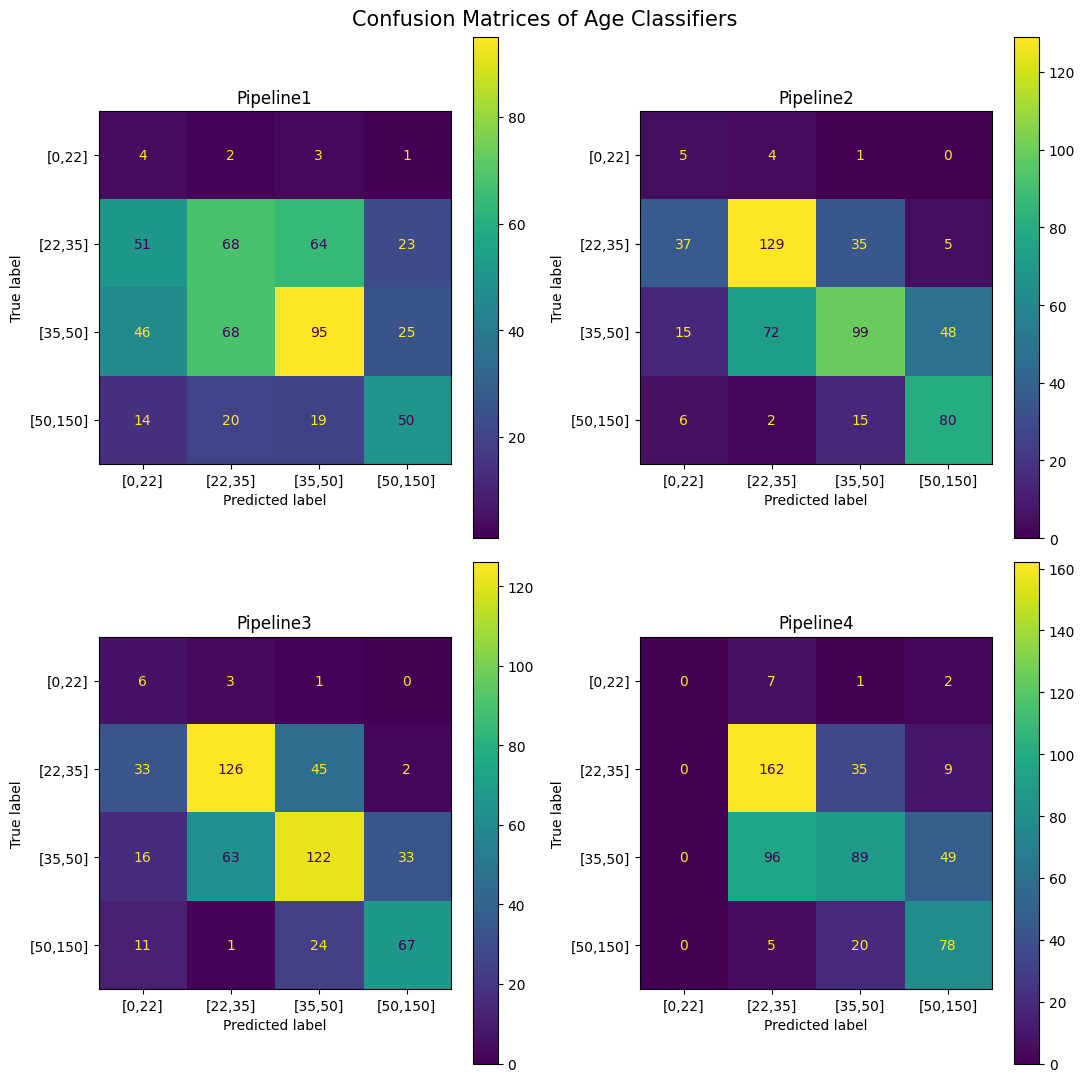

In [ ]:
#confusion matrix plotting

fig=plt.figure(figsize=(11,11))

for i,key in enumerate(age_models_dict.keys()):

    ax=fig.add_subplot(2,2,i+1,title=f"Pipeline{int(key)}")

    cm=confusion_matrix(y_age_classified_test,age_models_dict[key].predict(X_age_test))
    cm_display=ConfusionMatrixDisplay(cm,display_labels=["[0,18]","[18,35]","[35,58]","[58,150]"])
    cm_display.plot(ax=ax)

plt.suptitle("Confusion Matrices of Age Classifiers",fontsize=15)
plt.savefig("age_cm")
plt.tight_layout()
plt.show()    

Classification report of age classifier pipeline on the test set:
              precision    recall  f1-score   support

           1       0.23      0.30      0.26        10
           2       0.65      0.71      0.68       206
           3       0.60      0.60      0.60       234
           4       0.76      0.57      0.65       103

    accuracy                           0.63       553
   macro avg       0.56      0.55      0.55       553
weighted avg       0.64      0.63      0.63       553



<Figure size 1200x600 with 0 Axes>

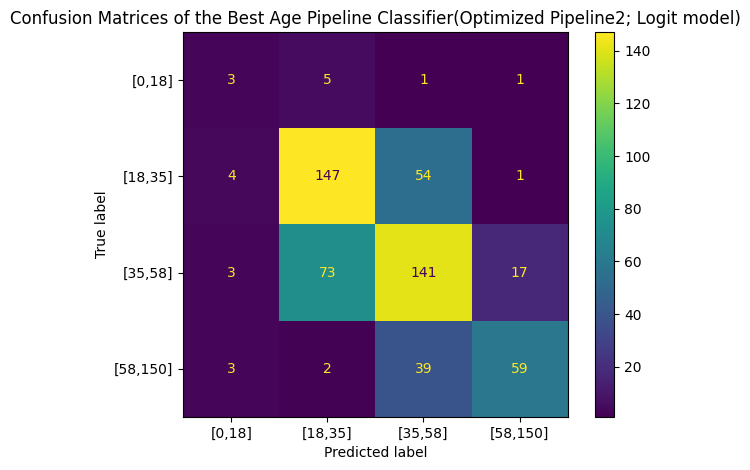

In [63]:
#tuning the best model, pipeline 2 

from sklearn.model_selection import train_test_split

#classification binning
age_bins=np.array([0,18,35,58,150]) #age_classes=[1,2,3,4,5,6]

#age_bins=np.array([0,27,32,40,55,62,150])
y_age_classified=np.digitize(y_age,age_bins)


#train test split
X_age_train,X_age_test,y_age_classified_train,y_age_classified_test=train_test_split(X_age_features,y_age_classified,shuffle=True,
                                                                                     test_size=0.2,random_state=0,stratify=y_age_classified)

pipeline_age=Pipeline([("pca",PCA(n_components=44)),
                        ("logit",LogisticRegression(C=0.01,class_weight={1:3.8,2:1,3:1,4:1},penalty="l2"))])


pipeline_age.fit(X_age_train,y_age_classified_train)

print(f"Classification report of age classifier pipeline on the test set:")
print(classification_report(y_age_classified_test, pipeline_age.predict(X_age_test)))

plt.figure(figsize=(12,6))



cm=confusion_matrix(y_age_classified_test,pipeline_age.predict(X_age_test))
cm_display=ConfusionMatrixDisplay(cm,display_labels=["[0,18]","[18,35]","[35,58]","[58,150]"])
cm_display.plot()

plt.title("Confusion Matrices of the Best Age Pipeline Classifier(Optimized Pipeline2; Logit model)")
plt.tight_layout()
plt.show()  


I got 55% for the highest possible value of macro f1 average.

In [185]:
import joblib

pipeline_age.fit(X_age_features,y_age_classified)

joblib.dump(pipeline_age,"Best_Age_Model.joblib")

['Best_Age_Model.joblib']

In [ ]:
#########